In [70]:
# understanding the data
# Data cleaning and data wrangling
# Data visualization and representation 
# identifying outliers and imporving data 
# Correlation and anomaly detection
# Detecting and applying an algorithm of our choice to detect fradulant activities



In [71]:
# libraries 

#Data processing 
import pandas as pd 
import numpy as np 

#Data visualization 
import matplotlib.pyplot as plt

#misc 
import requests



In [72]:



# Send an HTTP GET request to the server
response = requests.get("https://rana-portfolio.com/Mock_Data_Sets/Fraud_CreditCard.csv")

if response.status_code == 200:
    # Read the content of the response
    file_contents = response.text
    
    # Convert the string to a StringIO object
    file_object = StringIO(file_contents)
    
    # Read the StringIO object as a DataFrame
    df = pd.read_csv(file_object)
    
    # Now you can work with the DataFrame 'df'
    print(df.head(2))
else:
    print("Failed to fetch the file. Status code:", response.status_code)


   Unnamed: 0 transaction_date !@#$%^&*()%Gender Age_Group Transaction_City  \
0           0       08/12/2023            Female   Over 45         Rochdale   
1           1       22/09/2022             Other  25 to 30             Kent   

  Merchant_Type   Card_Type Device_OS  !@$Amount  Unnamed: 9  ...       V20  \
0        Travel  Debit Card       iOS     149.62         0.0  ...  0.251412   
1        Retail      Paypal   Android       2.69         0.0  ... -0.069083   

        V21       V22       V23       V24       V25       V26       V27  \
0 -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558   
1 -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983   

        V28  is_Fraudulent  
0 -0.021053              0  
1  0.014724              0  

[2 rows x 39 columns]


In [73]:
df.head()

,Unnamed: 0,transaction_date,!@#$%^&*()%Gender,Age_Group,Transaction_City,Merchant_Type,Card_Type,Device_OS,!@$Amount,Unnamed: 9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,is_Fraudulent
0,0,08/12/2023,Female,Over 45,Rochdale,Travel,Debit Card,iOS,149.62,0.0,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1,22/09/2022,Other,25 to 30,Kent,Retail,Paypal,Android,2.69,0.0,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,2,07/07/2021,Other,31 to 35,Rochdale,Retail,Paypal,Windows,378.66,1.0,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,3,14/10/2023,Female,25 to 30,Southampton,Entertainment,Credit Card,Android,123.50,1.0,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,4,08/12/2023,Other,Over 45,London,Entertainment,Credit Card,iOS,69.99,2.0,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [74]:
# notice how some headings contains special characters, lets fix that. 
# we can remove the special characters by using regex 
df.columns = df.columns.str.replace(r'[^\w\s]', '', regex=True)

In [80]:
# renaming the columns 
df.rename(columns ={'Unnamed 0': 'column0','Unnamed 9' : 'column9'}, inplace = True)

In [81]:
df.columns

Index(['column0', 'transaction_date', 'Gender', 'Age_Group',
       'Transaction_City', 'Merchant_Type', 'Card_Type', 'Device_OS', 'Amount',
       'column9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'is_Fraudulent'],
      dtype='object')

the columns are renamed and special characters are removed


In [82]:
# we dont need column0 and column9 
# one way to check this is correlation factor between these columns and the rest
numeric_df = df.select_dtypes(include = 'number') # only select those columns that has a numeric value
correlation_factor_column0 = numeric_df.corr()["column0"]

In [83]:
correlation_factor_column0 

column0          1.000000
Amount          -0.015808
column9          0.993379
V1               0.111873
V2              -0.001170
V3              -0.404650
V4              -0.102289
V5               0.168638
V6              -0.062841
V7               0.081546
V8              -0.034901
V9              -0.003745
V10              0.025608
V11             -0.239628
V12              0.121110
V13             -0.056473
V14             -0.092074
V15             -0.177360
V16              0.010630
V17             -0.070109
V18              0.090488
V19              0.027438
V20             -0.049049
V21              0.040138
V22              0.134065
V23              0.050752
V24             -0.014528
V25             -0.227711
V26             -0.037922
V27             -0.004554
V28             -0.009412
is_Fraudulent   -0.011692
Name: column0, dtype: float64


 Interpretation of Correlation Values

0.9 to 1.0 (-0.9 to -1.0): Very strong positive (negative) correlation

0.7 to 0.9 (-0.7 to -0.9): Strong positive (negative) correlation

0.5 to 0.7 (-0.5 to -0.7): Moderate positive (negative) correlation

0.3 to 0.5 (-0.3 to -0.5): Weak positive (negative) correlation

0.0 to 0.3 (-0.0 to -0.3): Very weak or negligible positive (negative) correlation

If you notice correlation factor of column0 with all the other columns is very weak or negligible

##### this implies that column0 does not have any relationship with other columns.


In [84]:
# similarly lets check for column9 

correlation_factor_column9 = numeric_df.corr()["column9"]
correlation_factor_column9

column0          0.993379
Amount          -0.010607
column9          1.000000
V1               0.117436
V2              -0.010563
V3              -0.419632
V4              -0.105228
V5               0.173147
V6              -0.062966
V7               0.084752
V8              -0.036971
V9              -0.008655
V10              0.030614
V11             -0.247733
V12              0.124392
V13             -0.065937
V14             -0.098771
V15             -0.183449
V16              0.011885
V17             -0.073318
V18              0.090374
V19              0.029013
V20             -0.050887
V21              0.044741
V22              0.144031
V23              0.051130
V24             -0.016158
V25             -0.233110
V26             -0.041422
V27             -0.005161
V28             -0.009436
is_Fraudulent   -0.012329
Name: column9, dtype: float64

In [85]:
# hence we can drop these two columns
# before dropping them lets do the right thing and make a copy of the original dataset 

df_copy = df

In [90]:
# Drop two columns
df_copy = df_copy.drop(columns=['column0', 'column9'])

In [91]:
df_copy.columns

Index(['transaction_date', 'Gender', 'Age_Group', 'Transaction_City',
       'Merchant_Type', 'Card_Type', 'Device_OS', 'Amount', 'V1', 'V2', 'V3',
       'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
       'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24',
       'V25', 'V26', 'V27', 'V28', 'is_Fraudulent'],
      dtype='object')

##### Dealing with missing values is one of the most important and tricky part to do with the dataset.Normally, people delete the null rows and work with the rest of the dataset but in most cases there is organisation defined rules to deals with missing values, e.g Constant values or new feature column etc.

#####  There are several options disscussed below. Option 1: Drop missing values T_cols = T_cols.dropna()

##### Option 2 : Impute the Mission Values You can use various imputation techniques, such as mean, median, mode, or advanced methods like regression imputation or K-nearest neighbors imputation.

In [92]:
#Suitable for categorical 
# Assuming 'T_cols' is your DataFrame with missing values 
columns_to_impute = ['Gender','Age_Group','Transaction_City','Device_OS']  
# fill null with most repeated values
df_copy[columns_to_impute] = df_copy[columns_to_impute].fillna(df_copy[columns_to_impute].mode().iloc[0])


numeric_columns_to_impute=['Amount','V1','V6','V8','V16']
# numeric_columns_to_impute=['Amount','Column_9','V1','V6','V8','V16']
# Assuming 'data' is your DataFrame with missing date values
df_copy[numeric_columns_to_impute] = df_copy[numeric_columns_to_impute].fillna(method='ffill')  # Forward fill

C:\Users\Azeem\AppData\Local\Temp\ipykernel_52440\136204539.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_copy[numeric_columns_to_impute] = df_copy[numeric_columns_to_impute].fillna(method='ffill')  # Forward fill


In [93]:
df_copy.isna().sum()

transaction_date    0
Gender              0
Age_Group           0
Transaction_City    0
Merchant_Type       0
Card_Type           0
Device_OS           0
Amount              0
V1                  0
V2                  0
V3                  0
V4                  0
V5                  0
V6                  0
V7                  0
V8                  0
V9                  0
V10                 0
V11                 0
V12                 0
V13                 0
V14                 0
V15                 0
V16                 0
V17                 0
V18                 0
V19                 0
V20                 0
V21                 0
V22                 0
V23                 0
V24                 0
V25                 0
V26                 0
V27                 0
V28                 0
is_Fraudulent       0
dtype: int64

In [94]:
# to check the skewness of the dataset 
print('No Frauds', round(df['is_Fraudulent'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['is_Fraudulent'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

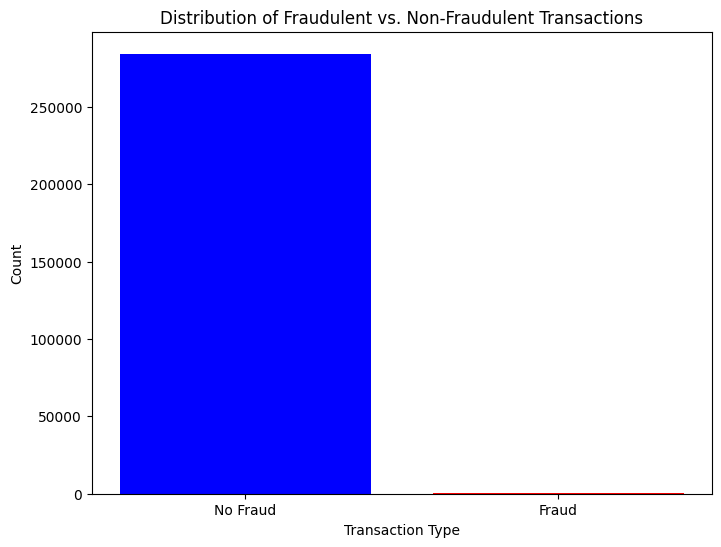

In [95]:
fraud_counts = df['is_Fraudulent'].value_counts()
fraud_labels = ['No Fraud', 'Fraud']  # Labels for the plot

# Create a histogram (bar plot) for the fraud distribution
plt.figure(figsize=(8, 6))
plt.bar(fraud_labels, fraud_counts, color=['blue', 'red'])
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.show()

##### Scaling and Distributing
In this phase of our kernel, we will first scale the columns comprise of Time and Amount . Time and amount should be scaled as the other columns. On the other hand, we need to also create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.
##### What is a sub-Sample?
In this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. Meaning our sub-sample will have the same amount of fraud and non fraud transactions.
##### Why do we create a sub-Sample?
In the beginning of this notebook we saw that the original dataframe was heavily imbalanced! Using the original dataframe will cause the following issues:
Overfitting: Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain when a fraud occurs.
Wrong Correlations: Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features.
